In [33]:
import os
from typing import List, Dict
from datasets import Dataset, Audio
import pandas as pd


In [68]:
AUDIO_FOLDER = 'data/INPUT_ENG'

In [69]:
def transform_folder_name(folder_name: str) -> str:
    """Преобразует имя папки в валидную форму

    Args:
        folder_name (str): [имя папки]
    """
    folder_name = folder_name if folder_name[-1] == "/" else folder_name + "/"
    return folder_name

In [97]:
def get_files_from_folder(folder_path: str, is_metadata_csv_used: bool=False)-> List[str]:
    """Получить список файлов в каталоге
    Args:
        folder_path ([str]): [путь к каталогу]
        is_relative ([bool], optional): [выдать относительные пути к файлам]. Defaults to False:bool.

    Returns:
        List[str]: [список с файлами]
    """
    folder_path = transform_folder_name(folder_path)
    files_list = []
    
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(("wav", "mp3")):
                if is_metadata_csv_used:
                    files_list.append(file)
                else:
                    files_list.append(os.path.join(root, file))
    return files_list


In [98]:
def create_dict_metadata(features: List[str], values:List[List[any]]) -> Dict[str, List[str]]:
    """Создать словарь с метаданными

    Args:
        columns ([List]): [columns for created metadata file]
        col_values ([List[List]]): [values of their columns]

    Returns:
        Dict[str, List[str]]: [словарь с метаданными]
    """
    len_for_padd = max([len(value) for value in values if value is not None])
    for val in range(len(values)):
        values[val] = values[val] if values[val] is not None else ["Empty"] * len_for_padd
    return {features[i]: values[i] for i in range(len(features))}

In [99]:
def create_metadatacsv(folder_path, metadata: Dict[List[str], List[any]]) -> str:
    """Создает файл с метаданными
    Args:
        folder_path ([str]): [путь, где будет лежать файл]
        Dict[List[str], List[any]]: [признак: значения]
        
    Returns:
        str: [путь до файла с метаданными]
    """
    df = pd.DataFrame(metadata)
    folder_path = transform_folder_name(folder_path)
    metadata_path = folder_path + "metadata.csv"
    if os.path.isfile(metadata_path):
        os.remove(metadata_path)
    df.to_csv(metadata_path, index=False, sep=",")
    assert os.path.isfile(metadata_path), "FIle was not created!"
    return metadata_path

In [100]:
audio_files = get_files_from_folder(AUDIO_FOLDER, True)

features = ["file_name"]
feature_values = [audio_files]


In [101]:
metadata = create_dict_metadata(features, feature_values)

In [102]:
df = pd.read_csv(create_metadatacsv(AUDIO_FOLDER, metadata))

In [103]:
audio_dataset = Dataset.from_dict(metadata).cast_column("file_name", Audio())
audio_dataset

Dataset({
    features: ['file_name'],
    num_rows: 135
})

**С использованием metadata.csv**

In [104]:
from datasets import load_dataset

dataset = load_dataset("audiofolder", data_dir=AUDIO_FOLDER)
# OR by specifying the list of files
# dataset = load_dataset("audiofolder", data_files=["path/to/audio_1", "path/to/audio_2", ..., "path/to/audio_n"])

Generating train split: 135 examples [00:00, 10727.12 examples/s]


In [83]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio'],
        num_rows: 135
    })
})

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
import librosa

array, sampling_rate = librosa.load("/home/zen/Документы/Курсы/HFAudio/data/INPUT_ENG/qqq.wav")

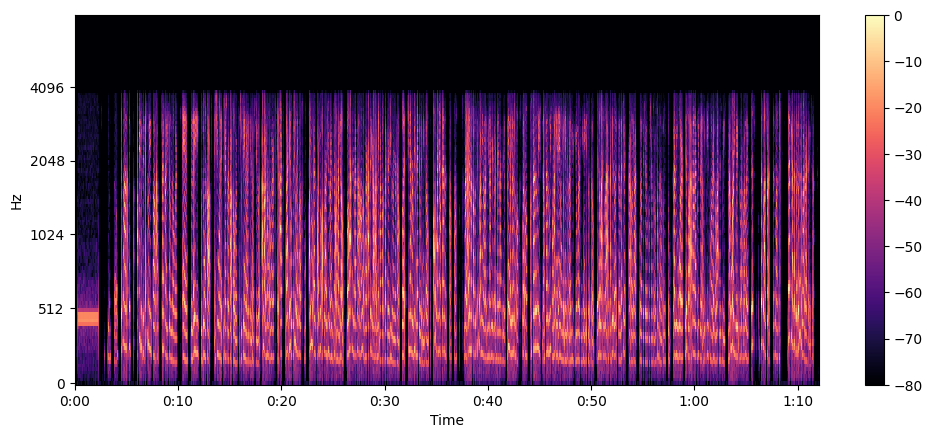

In [66]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()